# validate json file with image

In [1]:
!pip install pycocotools


In [8]:
# 필요한 라이브러리 임포트
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import os
from PIL import Image

# JSON 파일 경로 (검증할 파일의 경로로 변경)
json_file = 'assets/data/bacon/bacon1.json'

# COCO API를 통해 JSON 파일 로드
coco = COCO(json_file)

# 카테고리 정보 출력
cats = coco.loadCats(coco.getCatIds())
print("카테고리 정보:")
for cat in cats:
    print(cat)

# 이미지 정보 출력 (예: 처음 3개 이미지 정보)
img_ids = coco.getImgIds()
print("\n이미지 정보 (처음 3개):")
imgs = coco.loadImgs(img_ids[:3])
for img in imgs:
    print(img)

# 특정 이미지에 대한 annotation 시각화 예제
def show_image_with_annotations(img_info):
    # 이미지 파일 경로 설정 (JSON에 저장된 file_name 기준으로 경로 수정)
    image_path = os.path.join('images', img_info['file_name'])
    image = Image.open(image_path)
    
    # Matplotlib로 이미지 표시
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    ax = plt.gca()
    
    # 해당 이미지에 해당하는 annotation 불러오기
    ann_ids = coco.getAnnIds(imgIds=img_info['id'])
    anns = coco.loadAnns(ann_ids)
    
    for ann in anns:
        # bbox는 [x, y, width, height] 형식
        bbox = ann['bbox']
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        # 카테고리 이름 표시
        cat_id = ann['category_id']
        cat = coco.loadCats(cat_id)[0]['name']
        plt.text(bbox[0], bbox[1]-5, cat, color='red', fontsize=12, backgroundcolor='white')
    plt.axis('off')
    plt.show()

# 첫 번째 이미지에 대한 검증 예제
if imgs:
    show_image_with_annotations(imgs[0])


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


KeyError: 'categories'

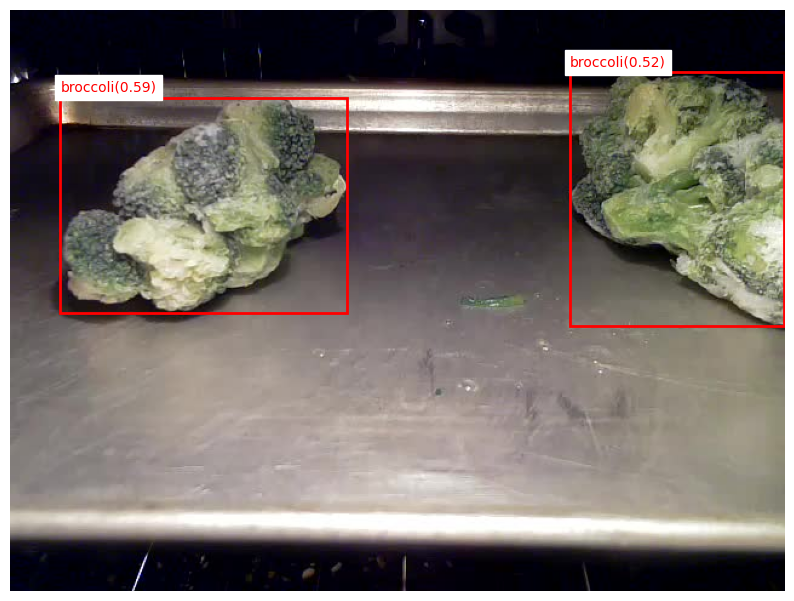

In [21]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def visualize_annotations(json_path, image_path):
    """
    Load a JSON annotation file and an image, then visualize the bounding boxes and labels on the image.
    
    Parameters:
        json_path (str): Path to the JSON annotation file.
        image_path (str): Path to the image file.
    """
    # Load the JSON file
    with open(json_path, 'r') as f:
        data = json.load(f)
    
    # Retrieve boxes and labels from the JSON
    boxes = data.get("boxes", [])
    labels = data.get("labels", [])
    
    # Check if the number of boxes matches the number of labels
    if len(boxes) != len(labels):
        print("Error: The number of boxes does not match the number of labels.")
        return
    
    # Open the image using PIL
    image = Image.open(image_path)
    
    # Create a figure and axis with matplotlib
    fig, ax = plt.subplots(1, figsize=(10, 8))
    ax.imshow(image)
    
    # Loop over each box and label to draw them on the image
    for box, label in zip(boxes, labels):
        if len(box) != 4:
            print(f"Warning: Skipping invalid box {box}.")
            continue
        
        x_min, y_min, x_max, y_max = box
        width = x_max - x_min
        height = y_max - y_min
        
        # Create a rectangle patch for the bounding box
        rect = patches.Rectangle((x_min, y_min), width, height,
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        
        # Add the label text above the rectangle
        ax.text(x_min, y_min - 5, label, fontsize=10, color='red', 
                backgroundcolor='white')
    
    # Remove axis labels and show the image
    plt.axis('off')
    plt.show()

# Example usage in Jupyter Notebook:
# Update these paths with the correct locations of your files.
    

json_path = "assets/data/french-fries/french-fries3.json"  # e.g., "data/annotation.json"
image_path = "assets/data/french-fries/french-fries3.jpg"        # e.g., "data/image.jpg"

json_path = "assets/data/whole-chicken/whole-chicken1.json"  # e.g., "data/annotation.json"
image_path = "assets/data/whole-chicken/whole-chicken1.jpg"        # e.g., "data/image.jpg"

json_path = "assets/data/turkey/turkey1.json"  # e.g., "data/annotation.json"
image_path = "assets/data/turkey/turkey1.jpg"        # e.g., "data/image.jpg"

json_path = "assets/data/tots/lower-rack-tots/lower-rack-tots1.json"  # e.g., "data/annotation.json"
image_path = "assets/data/tots/lower-rack-tots/lower-rack-tots1.jpg"        # e.g., "data/image.jpg"

json_path = "assets/data/cut-potatoes/cut-potatoes1.json"  # e.g., "data/annotation.json"
image_path = "assets/data/cut-potatoes/cut-potatoes1.jpg"        # e.g., "data/image.jpg"

json_path = "assets/data/cookies/lower-rack-cookies/lower-rack-cookies1.json"  # e.g., "data/annotation.json"
image_path = "assets/data/cookies/lower-rack-cookies/lower-rack-cookies1.jpg"        # e.g., "data/image.jpg"

json_path = "assets/data/steak/steak1.json"  # e.g., "data/annotation.json"
image_path = "assets/data/steak/steak1.jpg"        # e.g., "data/image.jpg"

json_path = "assets/data/salmon/salmon1.json"  # e.g., "data/annotation.json"
image_path = "assets/data/salmon/salmon1.jpg"        # e.g., "data/image.jpg"

json_path = "assets/data/cauliflower/cauliflower1.json"  # e.g., "data/annotation.json"
image_path = "assets/data/cauliflower/cauliflower1.jpg"        # e.g., "data/image.jpg"

json_path = "assets/data/chicken-wings/chicken-wings1.json"  # e.g., "data/annotation.json"
image_path = "assets/data/chicken-wings/chicken-wings1.jpg"        # e.g., "data/image.jpg"

json_path = "assets/data/chicken-nuggets/chicken-nuggets3.json"  # e.g., "data/annotation.json"
image_path = "assets/data/chicken-nuggets/chicken-nuggets3.jpg"        # e.g., "data/image.jpg"

json_path = "assets/data/cake/cake5.json"  # e.g., "data/annotation.json"
image_path = "assets/data/cake/cake5.jpg"        # e.g., "data/image.jpg"

json_path = "assets/data/brownies/brownies1.json"  # e.g., "data/annotation.json"
image_path = "assets/data/brownies/brownies1.jpg"        # e.g., "data/image.jpg"

json_path = "assets/data/broccoli/broccoli1.json"  # e.g., "data/annotation.json"
image_path = "assets/data/broccoli/broccoli1.jpg"        # e.g., "data/image.jpg"

json_path = "assets/data/biscuits/biscuits1.json"  # e.g., "data/annotation.json"
image_path = "assets/data/biscuits/biscuits1.jpg"        # e.g., "data/image.jpg"

visualize_annotations(json_path, image_path)
